# Convolutional Neural Networks (CNNs) with CIFAR-100 dataset

## Initialisation of the program

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop

2025-03-23 11:49:14.498144: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-23 11:49:17.464109: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 11:49:18.373591: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-23 11:49:18.373632: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

## Load & Preprocess the CIFAR-100 Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print('X_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert to categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# float and normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)
print("Number of Classes:", y_train.shape[1])

Training Data Shape: (50000, 32, 32, 3)
Testing Data Shape: (10000, 32, 32, 3)
Number of Classes: 100


Sample input image: [[[0.98039216 0.98039216 0.972549  ]
  [0.972549   0.9764706  0.9529412 ]
  [0.96862745 0.972549   0.9372549 ]
  ...
  [0.98039216 0.98039216 0.9647059 ]
  [0.98039216 0.98039216 0.9647059 ]
  [0.9764706  0.98039216 0.9647059 ]]

 [[0.98039216 0.9843137  0.9607843 ]
  [0.972549   0.9764706  0.93333334]
  [0.96862745 0.96862745 0.91764706]
  ...
  [0.9843137  0.9843137  0.9490196 ]
  [0.9843137  0.9882353  0.9529412 ]
  [0.98039216 0.9843137  0.9529412 ]]

 [[0.9843137  0.9843137  0.95686275]
  [0.98039216 0.972549   0.92941177]
  [0.98039216 0.9607843  0.9137255 ]
  ...
  [0.98039216 0.9764706  0.93333334]
  [0.98039216 0.9764706  0.9411765 ]
  [0.98039216 0.9764706  0.9490196 ]]

 ...

 [[0.8666667  0.8352941  0.7490196 ]
  [0.8666667  0.80784315 0.6901961 ]
  [0.88235295 0.8117647  0.70980394]
  ...
  [0.78039217 0.6901961  0.5254902 ]
  [0.8117647  0.75686276 0.64705884]
  [0.9137255  0.8980392  0.8862745 ]]

 [[0.88235295 0.8745098  0.8       ]
  [0.8901961  0.8

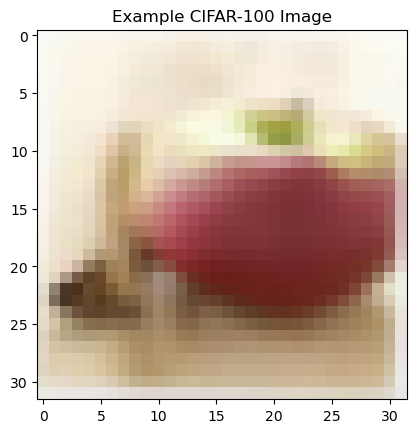

In [4]:
Selected_Image = 2
image = x_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.title("Example CIFAR-100 Image")
plt.show()


## Define a CNN Model

In [5]:
model = Sequential()

# First convolutional block
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional block
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third convolutional block
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))  # 100 classes for CIFAR-100


2025-03-23 11:50:34.332217: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-23 11:50:34.333057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2025-03-23 11:50:34.333577: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2025-03-23 11:50:34.334087: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2025-03-23 11:50:34.335185: W tensorfl

#### Compile & Train the Model

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                        

In [7]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20,
                    validation_split=0.2, verbose=1)


Epoch 1/20
313/313 [==============================] - 59s 172ms/step - loss: 4.4406 - accuracy: 0.0271 - val_loss: 4.2067 - val_accuracy: 0.0530
Epoch 2/20
313/313 [==============================] - 54s 172ms/step - loss: 3.9742 - accuracy: 0.0856 - val_loss: 3.5983 - val_accuracy: 0.1529
Epoch 3/20
313/313 [==============================] - 53s 170ms/step - loss: 3.5896 - accuracy: 0.1529 - val_loss: 3.2359 - val_accuracy: 0.2267
Epoch 4/20
313/313 [==============================] - 54s 173ms/step - loss: 3.2800 - accuracy: 0.2087 - val_loss: 3.1215 - val_accuracy: 0.2473
Epoch 5/20
313/313 [==============================] - 54s 173ms/step - loss: 3.0349 - accuracy: 0.2543 - val_loss: 2.9115 - val_accuracy: 0.2843
Epoch 6/20
313/313 [==============================] - 56s 178ms/step - loss: 2.8201 - accuracy: 0.2944 - val_loss: 2.7706 - val_accuracy: 0.3103
Epoch 7/20
313/313 [==============================] - 56s 177ms/step - loss: 2.6394 - accuracy: 0.3300 - val_loss: 2.6392 - val_ac

#### Save the model

In [8]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("cifar10_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the trained weights to an H5 file
model.save_weights("cifar10.weights.h5")

print("Model architecture and weights saved successfully.")


Model architecture and weights saved successfully.


#### Load Model

In [ ]:
from tensorflow.keras.models import model_from_json

# Load the model architecture
with open("cifar10_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

# Load the trained weights
loaded_model.load_weights("cifar10.weights.h5")

# Compile the Model Before Using
loaded_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


print("Model loaded successfully.")

### Evaluate the Model

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 [==============================] - 6s 18ms/step - loss: 2.2134 - accuracy: 0.4858
Test Accuracy: 0.4858
Test Loss: 2.2134


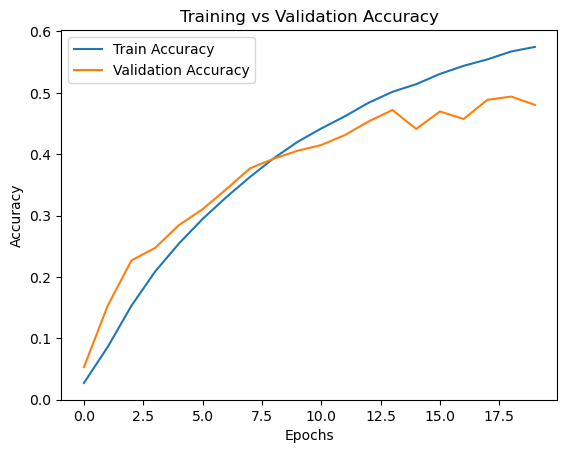

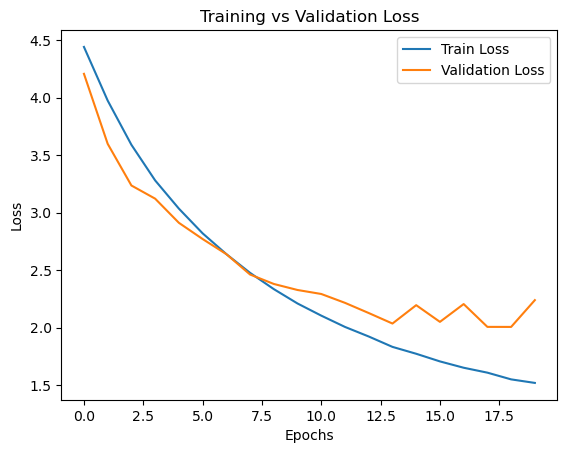

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


#### Generate a Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 5s 15ms/step


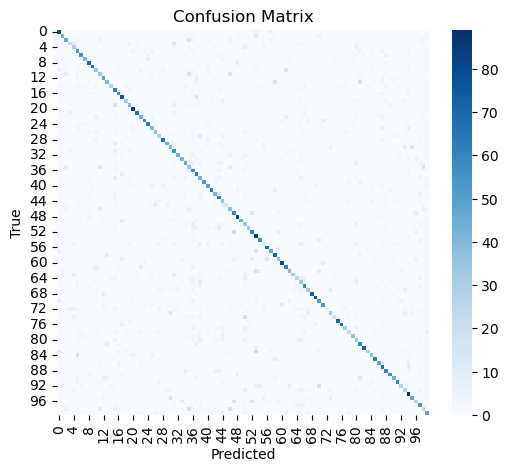

In [17]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=False, cmap="Blues", fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

## Tune Hyperparameters

#### Initialise parameters 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100
import optuna
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train, y_test = to_categorical(y_train, 100), to_categorical(y_test, 100)  # One-hot encoding

if not os.path.exists("optuna_models"):
    os.makedirs("optuna_models")

# Define hyperparameter grid
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [64, 128]
dropout_rates = [0.2, 0.3, 0.5]
optimizers = ["SGD", "Adam", "RMSprop"]

#### Test all combinations of hyperparameters

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
results = []

# Define the objective function for Optuna
def objective(trial):
    # Sample hyperparameters from the fixed list
    learning_rate = trial.suggest_categorical("learning_rate", learning_rates)
    batch_size = trial.suggest_categorical("batch_size", batch_sizes)
    dropout_rate = trial.suggest_categorical("dropout_rate", dropout_rates)
    optimizer_name = trial.suggest_categorical("optimizer", optimizers)

    # Select optimizer
    if optimizer_name == "SGD":
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer_name == "Adam":
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    # Build CNN Model
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(dropout_rate),
        Dense(100, activation='softmax')
    ])

    # Compile Model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

    # Train Model
    history = model.fit(x_train, y_train, 
                        batch_size=batch_size, 
                        epochs=50,
                        validation_split=0.2,
                        callbacks=[early_stop],
                        verbose=1)

    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    # Save best model
    model.save(f"optuna_models/model_lr{learning_rate}_bs{batch_size}_dr{dropout_rate}_opt{optimizer_name}.h5")

    # Store result
    results.append({
        'Learning Rate': learning_rate,
        'Batch Size': batch_size,
        'Dropout': dropout_rate,
        'Optimizer': optimizer_name,
        'Test Accuracy': test_acc
    })

    return test_acc  # Optuna will maximize this value

# Create an Optuna study and optimize
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=27)  # Run 27 trials for all hyperparameter combinations

# Convert results to DataFrame and sort by accuracy
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Test Accuracy', ascending=False)

# Show best hyperparameter combination
print("\nBest Hyperparameters Found:")
print(study.best_params)

# Save results to CSV
df_results.to_csv("optuna_hyperparameter_results.csv", index=False)

[I 2025-03-22 17:09:58,980] A new study created in memory with name: no-name-4afcce6d-23a2-438e-b060-c528223594a5


Epoch 1/50
625/625 [==============================] - 46s 73ms/step - loss: 4.6365 - accuracy: 0.0171 - val_loss: 4.4938 - val_accuracy: 0.0321
Epoch 2/50
625/625 [==============================] - 46s 73ms/step - loss: 4.4463 - accuracy: 0.0344 - val_loss: 4.1971 - val_accuracy: 0.0676
Epoch 3/50
625/625 [==============================] - 46s 73ms/step - loss: 4.2473 - accuracy: 0.0551 - val_loss: 4.0601 - val_accuracy: 0.0818
Epoch 4/50
625/625 [==============================] - 43s 69ms/step - loss: 4.0881 - accuracy: 0.0705 - val_loss: 3.8578 - val_accuracy: 0.1228
Epoch 5/50
625/625 [==============================] - 43s 69ms/step - loss: 3.9689 - accuracy: 0.0853 - val_loss: 3.7246 - val_accuracy: 0.1388
Epoch 6/50
625/625 [==============================] - 52s 82ms/step - loss: 3.8806 - accuracy: 0.0974 - val_loss: 3.6139 - val_accuracy: 0.1603
Epoch 7/50
625/625 [==============================] - 44s 71ms/step - loss: 3.8078 - accuracy: 0.1085 - val_loss: 3.5108 - val_accuracy:

[I 2025-03-22 17:47:34,141] Trial 0 finished with value: 0.4650000035762787 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'dropout_rate': 0.5, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.4650000035762787.


Epoch 1/50
313/313 [==============================] - 43s 134ms/step - loss: 4.2699 - accuracy: 0.0545 - val_loss: 4.2000 - val_accuracy: 0.0587
Epoch 2/50
313/313 [==============================] - 42s 134ms/step - loss: 3.8316 - accuracy: 0.1000 - val_loss: 3.5965 - val_accuracy: 0.1420
Epoch 3/50
313/313 [==============================] - 41s 130ms/step - loss: 3.6195 - accuracy: 0.1340 - val_loss: 3.4116 - val_accuracy: 0.1750
Epoch 4/50
313/313 [==============================] - 43s 137ms/step - loss: 3.3935 - accuracy: 0.1753 - val_loss: 3.2029 - val_accuracy: 0.2233
Epoch 5/50
313/313 [==============================] - 42s 133ms/step - loss: 3.1884 - accuracy: 0.2115 - val_loss: 3.0148 - val_accuracy: 0.2514
Epoch 6/50
313/313 [==============================] - 41s 131ms/step - loss: 2.9553 - accuracy: 0.2596 - val_loss: 2.8102 - val_accuracy: 0.2959
Epoch 7/50
313/313 [==============================] - 42s 135ms/step - loss: 2.7271 - accuracy: 0.3065 - val_loss: 2.5024 - val_ac

[I 2025-03-22 18:04:55,394] Trial 1 finished with value: 0.4997999966144562 and parameters: {'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.3, 'optimizer': 'SGD'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
313/313 [==============================] - 43s 135ms/step - loss: 4.9145 - accuracy: 0.0148 - val_loss: 4.6022 - val_accuracy: 0.0164
Epoch 2/50
313/313 [==============================] - 40s 128ms/step - loss: 4.5850 - accuracy: 0.0236 - val_loss: 4.4983 - val_accuracy: 0.0413
Epoch 3/50
313/313 [==============================] - 42s 133ms/step - loss: 4.5120 - accuracy: 0.0314 - val_loss: 4.4051 - val_accuracy: 0.0515
Epoch 4/50
313/313 [==============================] - 42s 133ms/step - loss: 4.4533 - accuracy: 0.0384 - val_loss: 4.3275 - val_accuracy: 0.0600
Epoch 5/50
313/313 [==============================] - 41s 131ms/step - loss: 4.3950 - accuracy: 0.0461 - val_loss: 4.2687 - val_accuracy: 0.0721
Epoch 6/50
313/313 [==============================] - 42s 133ms/step - loss: 4.3388 - accuracy: 0.0512 - val_loss: 4.1997 - val_accuracy: 0.0806
Epoch 7/50
313/313 [==============================] - 41s 132ms/step - loss: 4.2854 - accuracy: 0.0580 - val_loss: 4.1336 - val_ac

[I 2025-03-22 18:39:34,470] Trial 2 finished with value: 0.25529998540878296 and parameters: {'learning_rate': 0.0001, 'batch_size': 128, 'dropout_rate': 0.3, 'optimizer': 'SGD'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
313/313 [==============================] - 43s 134ms/step - loss: 4.2920 - accuracy: 0.0939 - val_loss: 4.5666 - val_accuracy: 0.0370
Epoch 2/50
313/313 [==============================] - 42s 133ms/step - loss: 3.1305 - accuracy: 0.2386 - val_loss: 3.1812 - val_accuracy: 0.2488
Epoch 3/50
313/313 [==============================] - 44s 142ms/step - loss: 2.5965 - accuracy: 0.3418 - val_loss: 2.8770 - val_accuracy: 0.2993
Epoch 4/50
313/313 [==============================] - 47s 150ms/step - loss: 2.1869 - accuracy: 0.4301 - val_loss: 2.4302 - val_accuracy: 0.3981
Epoch 5/50
313/313 [==============================] - 42s 135ms/step - loss: 1.8477 - accuracy: 0.5066 - val_loss: 2.4063 - val_accuracy: 0.4082
Epoch 6/50
313/313 [==============================] - 42s 134ms/step - loss: 1.5270 - accuracy: 0.5784 - val_loss: 2.4948 - val_accuracy: 0.4087
Epoch 7/50
313/313 [==============================] - 41s 130ms/step - loss: 1.2415 - accuracy: 0.6431 - val_loss: 2.5450 - val_ac

[I 2025-03-22 18:48:53,186] Trial 3 finished with value: 0.4406000077724457 and parameters: {'learning_rate': 0.001, 'batch_size': 128, 'dropout_rate': 0.2, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
625/625 [==============================] - 45s 70ms/step - loss: 4.9704 - accuracy: 0.0105 - val_loss: 4.6028 - val_accuracy: 0.0136
Epoch 2/50
625/625 [==============================] - 44s 71ms/step - loss: 4.6359 - accuracy: 0.0120 - val_loss: 4.6029 - val_accuracy: 0.0123
Epoch 3/50
625/625 [==============================] - 46s 73ms/step - loss: 4.6180 - accuracy: 0.0120 - val_loss: 4.6007 - val_accuracy: 0.0148
Epoch 4/50
625/625 [==============================] - 43s 69ms/step - loss: 4.6065 - accuracy: 0.0132 - val_loss: 4.5951 - val_accuracy: 0.0201
Epoch 5/50
625/625 [==============================] - 44s 71ms/step - loss: 4.5967 - accuracy: 0.0154 - val_loss: 4.5750 - val_accuracy: 0.0289
Epoch 6/50
625/625 [==============================] - 44s 70ms/step - loss: 4.5761 - accuracy: 0.0184 - val_loss: 4.5317 - val_accuracy: 0.0384
Epoch 7/50
625/625 [==============================] - 44s 71ms/step - loss: 4.5494 - accuracy: 0.0237 - val_loss: 4.4922 - val_accuracy:

[I 2025-03-22 19:26:10,986] Trial 4 finished with value: 0.19539999961853027 and parameters: {'learning_rate': 0.0001, 'batch_size': 64, 'dropout_rate': 0.5, 'optimizer': 'SGD'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
625/625 [==============================] - 49s 76ms/step - loss: 5.9750 - accuracy: 0.0158 - val_loss: 4.6111 - val_accuracy: 0.0090
Epoch 2/50
625/625 [==============================] - 47s 75ms/step - loss: 4.6090 - accuracy: 0.0090 - val_loss: 4.6102 - val_accuracy: 0.0102
Epoch 3/50
625/625 [==============================] - 46s 73ms/step - loss: 4.6123 - accuracy: 0.0102 - val_loss: 4.6131 - val_accuracy: 0.0104
Epoch 4/50
625/625 [==============================] - 47s 75ms/step - loss: 4.6091 - accuracy: 0.0098 - val_loss: 4.6097 - val_accuracy: 0.0085
Epoch 5/50
625/625 [==============================] - 48s 76ms/step - loss: 4.6086 - accuracy: 0.0102 - val_loss: 4.6102 - val_accuracy: 0.0077
Epoch 6/50
625/625 [==============================] - 47s 75ms/step - loss: 4.6094 - accuracy: 0.0094 - val_loss: 4.6111 - val_accuracy: 0.0104
Epoch 7/50
625/625 [==============================] - 48s 77ms/step - loss: 4.6089 - accuracy: 0.0092 - val_loss: 4.6104 - val_accuracy:

[I 2025-03-22 19:31:51,687] Trial 5 finished with value: 0.009999999776482582 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'dropout_rate': 0.3, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
625/625 [==============================] - 50s 77ms/step - loss: 4.5303 - accuracy: 0.0199 - val_loss: 4.3376 - val_accuracy: 0.0307
Epoch 2/50
625/625 [==============================] - 45s 72ms/step - loss: 4.3226 - accuracy: 0.0320 - val_loss: 4.2724 - val_accuracy: 0.0402
Epoch 3/50
625/625 [==============================] - 47s 75ms/step - loss: 4.2188 - accuracy: 0.0413 - val_loss: 4.0319 - val_accuracy: 0.0669
Epoch 4/50
625/625 [==============================] - 47s 76ms/step - loss: 4.1334 - accuracy: 0.0523 - val_loss: 4.0345 - val_accuracy: 0.0774
Epoch 5/50
625/625 [==============================] - 45s 73ms/step - loss: 3.8175 - accuracy: 0.0997 - val_loss: 3.6460 - val_accuracy: 0.1395
Epoch 6/50
625/625 [==============================] - 47s 75ms/step - loss: 3.4167 - accuracy: 0.1754 - val_loss: 3.1922 - val_accuracy: 0.2241
Epoch 7/50
625/625 [==============================] - 46s 74ms/step - loss: 3.0817 - accuracy: 0.2392 - val_loss: 2.9986 - val_accuracy:

[I 2025-03-22 19:50:05,481] Trial 6 finished with value: 0.43479999899864197 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'dropout_rate': 0.3, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
313/313 [==============================] - 43s 135ms/step - loss: 4.2006 - accuracy: 0.0773 - val_loss: 4.4557 - val_accuracy: 0.0317
Epoch 2/50
313/313 [==============================] - 41s 131ms/step - loss: 3.6603 - accuracy: 0.1526 - val_loss: 3.4514 - val_accuracy: 0.2019
Epoch 3/50
313/313 [==============================] - 41s 132ms/step - loss: 3.3462 - accuracy: 0.2064 - val_loss: 3.1151 - val_accuracy: 0.2486
Epoch 4/50
313/313 [==============================] - 41s 131ms/step - loss: 3.0989 - accuracy: 0.2499 - val_loss: 2.9441 - val_accuracy: 0.2847
Epoch 5/50
313/313 [==============================] - 41s 132ms/step - loss: 2.8919 - accuracy: 0.2872 - val_loss: 2.8137 - val_accuracy: 0.3065
Epoch 6/50
313/313 [==============================] - 42s 134ms/step - loss: 2.6960 - accuracy: 0.3253 - val_loss: 2.6200 - val_accuracy: 0.3496
Epoch 7/50
313/313 [==============================] - 43s 137ms/step - loss: 2.5380 - accuracy: 0.3553 - val_loss: 2.5290 - val_ac

[I 2025-03-22 20:14:43,442] Trial 7 finished with value: 0.4927999973297119 and parameters: {'learning_rate': 0.0001, 'batch_size': 128, 'dropout_rate': 0.2, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
313/313 [==============================] - 45s 140ms/step - loss: 4.4233 - accuracy: 0.0439 - val_loss: 4.4520 - val_accuracy: 0.0361
Epoch 2/50
313/313 [==============================] - 42s 135ms/step - loss: 3.9780 - accuracy: 0.0811 - val_loss: 3.9131 - val_accuracy: 0.1077
Epoch 3/50
313/313 [==============================] - 43s 137ms/step - loss: 3.6846 - accuracy: 0.1190 - val_loss: 4.3061 - val_accuracy: 0.0782
Epoch 4/50
313/313 [==============================] - 42s 133ms/step - loss: 3.4332 - accuracy: 0.1578 - val_loss: 3.1032 - val_accuracy: 0.2277
Epoch 5/50
313/313 [==============================] - 43s 136ms/step - loss: 3.1986 - accuracy: 0.1950 - val_loss: 2.9732 - val_accuracy: 0.2520
Epoch 6/50
313/313 [==============================] - 44s 140ms/step - loss: 2.9665 - accuracy: 0.2366 - val_loss: 2.8075 - val_accuracy: 0.2926
Epoch 7/50
313/313 [==============================] - 44s 141ms/step - loss: 2.7495 - accuracy: 0.2826 - val_loss: 2.6866 - val_ac

[I 2025-03-22 20:27:48,850] Trial 8 finished with value: 0.44760000705718994 and parameters: {'learning_rate': 0.001, 'batch_size': 128, 'dropout_rate': 0.2, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
625/625 [==============================] - 44s 69ms/step - loss: 4.1196 - accuracy: 0.0671 - val_loss: 3.8430 - val_accuracy: 0.1173
Epoch 2/50
625/625 [==============================] - 45s 72ms/step - loss: 3.6170 - accuracy: 0.1364 - val_loss: 3.4304 - val_accuracy: 0.1722
Epoch 3/50
625/625 [==============================] - 45s 72ms/step - loss: 3.1944 - accuracy: 0.2152 - val_loss: 2.9783 - val_accuracy: 0.2569
Epoch 4/50
625/625 [==============================] - 44s 70ms/step - loss: 2.7749 - accuracy: 0.3018 - val_loss: 2.6560 - val_accuracy: 0.3275
Epoch 5/50
625/625 [==============================] - 44s 71ms/step - loss: 2.4044 - accuracy: 0.3796 - val_loss: 2.6243 - val_accuracy: 0.3468
Epoch 6/50
625/625 [==============================] - 45s 71ms/step - loss: 2.0874 - accuracy: 0.4437 - val_loss: 2.5635 - val_accuracy: 0.3655
Epoch 7/50
625/625 [==============================] - 43s 68ms/step - loss: 1.7751 - accuracy: 0.5187 - val_loss: 2.2853 - val_accuracy:

[I 2025-03-22 20:38:15,550] Trial 9 finished with value: 0.451200008392334 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'dropout_rate': 0.2, 'optimizer': 'SGD'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
313/313 [==============================] - 43s 136ms/step - loss: 4.2180 - accuracy: 0.0587 - val_loss: 4.3324 - val_accuracy: 0.0398
Epoch 2/50
313/313 [==============================] - 49s 155ms/step - loss: 3.7557 - accuracy: 0.1108 - val_loss: 3.5465 - val_accuracy: 0.1554
Epoch 3/50
313/313 [==============================] - 44s 139ms/step - loss: 3.4890 - accuracy: 0.1556 - val_loss: 3.2836 - val_accuracy: 0.2021
Epoch 4/50
313/313 [==============================] - 40s 129ms/step - loss: 3.2545 - accuracy: 0.1989 - val_loss: 2.9693 - val_accuracy: 0.2657
Epoch 5/50
313/313 [==============================] - 42s 133ms/step - loss: 3.0091 - accuracy: 0.2470 - val_loss: 2.7897 - val_accuracy: 0.3014
Epoch 6/50
313/313 [==============================] - 42s 134ms/step - loss: 2.7831 - accuracy: 0.2951 - val_loss: 2.6297 - val_accuracy: 0.3348
Epoch 7/50
313/313 [==============================] - 40s 129ms/step - loss: 2.5650 - accuracy: 0.3384 - val_loss: 2.5318 - val_ac

[I 2025-03-22 20:54:20,677] Trial 10 finished with value: 0.4997999966144562 and parameters: {'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.3, 'optimizer': 'SGD'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
313/313 [==============================] - 42s 132ms/step - loss: 4.2398 - accuracy: 0.0569 - val_loss: 4.2168 - val_accuracy: 0.0583
Epoch 2/50
313/313 [==============================] - 40s 129ms/step - loss: 3.7756 - accuracy: 0.1099 - val_loss: 3.6927 - val_accuracy: 0.1339
Epoch 3/50
313/313 [==============================] - 42s 133ms/step - loss: 3.5410 - accuracy: 0.1505 - val_loss: 3.3313 - val_accuracy: 0.1878
Epoch 4/50
313/313 [==============================] - 42s 133ms/step - loss: 3.3218 - accuracy: 0.1867 - val_loss: 3.1918 - val_accuracy: 0.2194
Epoch 5/50
313/313 [==============================] - 41s 131ms/step - loss: 3.0859 - accuracy: 0.2319 - val_loss: 2.9031 - val_accuracy: 0.2813
Epoch 6/50
313/313 [==============================] - 40s 127ms/step - loss: 2.8486 - accuracy: 0.2781 - val_loss: 2.8781 - val_accuracy: 0.2683
Epoch 7/50
313/313 [==============================] - 40s 129ms/step - loss: 2.6329 - accuracy: 0.3242 - val_loss: 2.5790 - val_ac

[I 2025-03-22 21:14:49,827] Trial 11 finished with value: 0.49970000982284546 and parameters: {'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.3, 'optimizer': 'SGD'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
313/313 [==============================] - 41s 130ms/step - loss: 4.1808 - accuracy: 0.0646 - val_loss: 4.2242 - val_accuracy: 0.0490
Epoch 2/50
313/313 [==============================] - 41s 130ms/step - loss: 3.7075 - accuracy: 0.1233 - val_loss: 3.4742 - val_accuracy: 0.1736
Epoch 3/50
313/313 [==============================] - 41s 130ms/step - loss: 3.4567 - accuracy: 0.1622 - val_loss: 3.3059 - val_accuracy: 0.1921
Epoch 4/50
313/313 [==============================] - 40s 127ms/step - loss: 3.2285 - accuracy: 0.2026 - val_loss: 3.0362 - val_accuracy: 0.2552
Epoch 5/50
313/313 [==============================] - 42s 133ms/step - loss: 3.0046 - accuracy: 0.2488 - val_loss: 2.7492 - val_accuracy: 0.3143
Epoch 6/50
313/313 [==============================] - 41s 132ms/step - loss: 2.7884 - accuracy: 0.2918 - val_loss: 2.6897 - val_accuracy: 0.3185
Epoch 7/50
313/313 [==============================] - 40s 128ms/step - loss: 2.5807 - accuracy: 0.3352 - val_loss: 2.4520 - val_ac

[I 2025-03-22 21:29:45,042] Trial 12 finished with value: 0.4918000102043152 and parameters: {'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.3, 'optimizer': 'SGD'}. Best is trial 1 with value: 0.4997999966144562.


Epoch 1/50
313/313 [==============================] - 41s 129ms/step - loss: 4.2600 - accuracy: 0.0510 - val_loss: 4.3147 - val_accuracy: 0.0470
Epoch 2/50
313/313 [==============================] - 41s 132ms/step - loss: 3.8371 - accuracy: 0.1004 - val_loss: 3.5584 - val_accuracy: 0.1559
Epoch 3/50
313/313 [==============================] - 39s 125ms/step - loss: 3.5994 - accuracy: 0.1345 - val_loss: 3.4917 - val_accuracy: 0.1552
Epoch 4/50
313/313 [==============================] - 40s 127ms/step - loss: 3.3776 - accuracy: 0.1767 - val_loss: 3.3108 - val_accuracy: 0.1987
Epoch 5/50
313/313 [==============================] - 40s 128ms/step - loss: 3.1414 - accuracy: 0.2186 - val_loss: 3.0516 - val_accuracy: 0.2408
Epoch 6/50
313/313 [==============================] - 40s 127ms/step - loss: 2.9281 - accuracy: 0.2610 - val_loss: 2.7086 - val_accuracy: 0.3040
Epoch 7/50
313/313 [==============================] - 40s 129ms/step - loss: 2.7014 - accuracy: 0.3100 - val_loss: 2.7485 - val_ac

[I 2025-03-22 21:44:05,367] Trial 13 finished with value: 0.5020999908447266 and parameters: {'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.3, 'optimizer': 'SGD'}. Best is trial 13 with value: 0.5020999908447266.


Epoch 1/50
313/313 [==============================] - 43s 131ms/step - loss: 16.0324 - accuracy: 0.0124 - val_loss: 4.6091 - val_accuracy: 0.0087
Epoch 2/50
313/313 [==============================] - 41s 132ms/step - loss: 4.6077 - accuracy: 0.0103 - val_loss: 4.6096 - val_accuracy: 0.0077
Epoch 3/50
313/313 [==============================] - 42s 133ms/step - loss: 4.6081 - accuracy: 0.0097 - val_loss: 4.6089 - val_accuracy: 0.0091
Epoch 4/50
313/313 [==============================] - 41s 130ms/step - loss: 4.6079 - accuracy: 0.0084 - val_loss: 4.6087 - val_accuracy: 0.0077
Epoch 5/50
313/313 [==============================] - 41s 131ms/step - loss: 4.6080 - accuracy: 0.0107 - val_loss: 4.6082 - val_accuracy: 0.0088
Epoch 6/50
313/313 [==============================] - 40s 128ms/step - loss: 4.6079 - accuracy: 0.0087 - val_loss: 4.6084 - val_accuracy: 0.0083
Epoch 7/50
313/313 [==============================] - 41s 130ms/step - loss: 4.6080 - accuracy: 0.0096 - val_loss: 4.6084 - val_a

[I 2025-03-22 21:51:52,024] Trial 14 finished with value: 0.009999999776482582 and parameters: {'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.3, 'optimizer': 'RMSprop'}. Best is trial 13 with value: 0.5020999908447266.


Epoch 1/50
313/313 [==============================] - 43s 133ms/step - loss: 4.2435 - accuracy: 0.0587 - val_loss: 4.2423 - val_accuracy: 0.0498
Epoch 2/50
313/313 [==============================] - 42s 134ms/step - loss: 3.7833 - accuracy: 0.1112 - val_loss: 3.4834 - val_accuracy: 0.1661
Epoch 3/50
313/313 [==============================] - 40s 128ms/step - loss: 3.5064 - accuracy: 0.1559 - val_loss: 3.3079 - val_accuracy: 0.1970
Epoch 4/50
313/313 [==============================] - 41s 130ms/step - loss: 3.2510 - accuracy: 0.2019 - val_loss: 3.0264 - val_accuracy: 0.2494
Epoch 5/50
313/313 [==============================] - 41s 131ms/step - loss: 3.0114 - accuracy: 0.2462 - val_loss: 2.7262 - val_accuracy: 0.3162
Epoch 6/50
313/313 [==============================] - 41s 131ms/step - loss: 2.7895 - accuracy: 0.2907 - val_loss: 2.5233 - val_accuracy: 0.3474
Epoch 7/50
313/313 [==============================] - 40s 129ms/step - loss: 2.5721 - accuracy: 0.3340 - val_loss: 2.4774 - val_ac

[I 2025-03-22 22:06:20,634] Trial 15 finished with value: 0.4950999915599823 and parameters: {'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.3, 'optimizer': 'SGD'}. Best is trial 13 with value: 0.5020999908447266.


Epoch 1/50
313/313 [==============================] - 44s 138ms/step - loss: 4.5899 - accuracy: 0.0144 - val_loss: 4.5417 - val_accuracy: 0.0265
Epoch 2/50
313/313 [==============================] - 47s 149ms/step - loss: 4.4202 - accuracy: 0.0285 - val_loss: 4.3075 - val_accuracy: 0.0457
Epoch 3/50
313/313 [==============================] - 40s 129ms/step - loss: 4.3057 - accuracy: 0.0376 - val_loss: 4.1922 - val_accuracy: 0.0610
Epoch 4/50
313/313 [==============================] - 41s 131ms/step - loss: 4.1886 - accuracy: 0.0547 - val_loss: 4.0082 - val_accuracy: 0.0999
Epoch 5/50
313/313 [==============================] - 40s 128ms/step - loss: 4.0537 - accuracy: 0.0752 - val_loss: 3.7450 - val_accuracy: 0.1250
Epoch 6/50
313/313 [==============================] - 42s 133ms/step - loss: 3.8821 - accuracy: 0.0957 - val_loss: 3.5441 - val_accuracy: 0.1615
Epoch 7/50
313/313 [==============================] - 41s 131ms/step - loss: 3.7077 - accuracy: 0.1233 - val_loss: 3.3453 - val_ac

[I 2025-03-22 22:35:18,265] Trial 16 finished with value: 0.5289000272750854 and parameters: {'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'SGD'}. Best is trial 16 with value: 0.5289000272750854.


Epoch 1/50
313/313 [==============================] - 43s 136ms/step - loss: 4.6231 - accuracy: 0.0121 - val_loss: 4.5777 - val_accuracy: 0.0171
Epoch 2/50
313/313 [==============================] - 42s 133ms/step - loss: 4.4604 - accuracy: 0.0223 - val_loss: 4.3087 - val_accuracy: 0.0431
Epoch 3/50
313/313 [==============================] - 44s 140ms/step - loss: 4.3656 - accuracy: 0.0326 - val_loss: 4.1977 - val_accuracy: 0.0607
Epoch 4/50
313/313 [==============================] - 47s 151ms/step - loss: 4.2680 - accuracy: 0.0449 - val_loss: 4.0768 - val_accuracy: 0.0886
Epoch 5/50
313/313 [==============================] - 39s 123ms/step - loss: 4.1480 - accuracy: 0.0580 - val_loss: 3.9655 - val_accuracy: 0.0927
Epoch 6/50
313/313 [==============================] - 40s 127ms/step - loss: 4.0049 - accuracy: 0.0779 - val_loss: 3.7017 - val_accuracy: 0.1194
Epoch 7/50
313/313 [==============================] - 41s 129ms/step - loss: 3.8484 - accuracy: 0.1013 - val_loss: 3.4934 - val_ac

[I 2025-03-22 22:54:34,392] Trial 17 finished with value: 0.4659999907016754 and parameters: {'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'SGD'}. Best is trial 16 with value: 0.5289000272750854.


Epoch 1/50
313/313 [==============================] - 44s 137ms/step - loss: 5.5812 - accuracy: 0.0096 - val_loss: 4.6079 - val_accuracy: 0.0087
Epoch 2/50
313/313 [==============================] - 42s 134ms/step - loss: 4.6141 - accuracy: 0.0090 - val_loss: 4.6098 - val_accuracy: 0.0102
Epoch 3/50
313/313 [==============================] - 41s 131ms/step - loss: 4.6076 - accuracy: 0.0101 - val_loss: 4.6081 - val_accuracy: 0.0086
Epoch 4/50
313/313 [==============================] - 42s 135ms/step - loss: 4.6080 - accuracy: 0.0088 - val_loss: 4.6087 - val_accuracy: 0.0084
Epoch 5/50
313/313 [==============================] - 42s 135ms/step - loss: 4.6076 - accuracy: 0.0101 - val_loss: 4.6089 - val_accuracy: 0.0087
Epoch 6/50
313/313 [==============================] - 43s 137ms/step - loss: 4.6078 - accuracy: 0.0095 - val_loss: 4.6086 - val_accuracy: 0.0089


[I 2025-03-22 22:59:04,252] Trial 18 finished with value: 0.009999999776482582 and parameters: {'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'Adam'}. Best is trial 16 with value: 0.5289000272750854.


Epoch 1/50
313/313 [==============================] - 43s 133ms/step - loss: 4.6444 - accuracy: 0.0180 - val_loss: 4.5917 - val_accuracy: 0.0085
Epoch 2/50
313/313 [==============================] - 41s 132ms/step - loss: 4.4523 - accuracy: 0.0365 - val_loss: 4.3293 - val_accuracy: 0.0632
Epoch 3/50
313/313 [==============================] - 41s 130ms/step - loss: 4.3059 - accuracy: 0.0532 - val_loss: 4.1189 - val_accuracy: 0.0952
Epoch 4/50
313/313 [==============================] - 39s 126ms/step - loss: 4.1861 - accuracy: 0.0656 - val_loss: 4.0132 - val_accuracy: 0.1117
Epoch 5/50
313/313 [==============================] - 42s 133ms/step - loss: 4.0784 - accuracy: 0.0791 - val_loss: 3.8679 - val_accuracy: 0.1314
Epoch 6/50
313/313 [==============================] - 41s 132ms/step - loss: 3.9743 - accuracy: 0.0919 - val_loss: 3.7629 - val_accuracy: 0.1470
Epoch 7/50
313/313 [==============================] - 41s 130ms/step - loss: 3.8766 - accuracy: 0.1051 - val_loss: 3.6398 - val_ac

[I 2025-03-22 23:33:35,518] Trial 19 finished with value: 0.5074999928474426 and parameters: {'learning_rate': 0.0001, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'RMSprop'}. Best is trial 16 with value: 0.5289000272750854.


Epoch 1/50
313/313 [==============================] - 43s 134ms/step - loss: 4.6459 - accuracy: 0.0159 - val_loss: 4.5777 - val_accuracy: 0.0170
Epoch 2/50
313/313 [==============================] - 40s 128ms/step - loss: 4.4603 - accuracy: 0.0355 - val_loss: 4.2953 - val_accuracy: 0.0684
Epoch 3/50
313/313 [==============================] - 42s 134ms/step - loss: 4.2969 - accuracy: 0.0576 - val_loss: 4.0735 - val_accuracy: 0.1054
Epoch 4/50
313/313 [==============================] - 42s 135ms/step - loss: 4.1622 - accuracy: 0.0729 - val_loss: 3.8762 - val_accuracy: 0.1276
Epoch 5/50
313/313 [==============================] - 42s 136ms/step - loss: 4.0298 - accuracy: 0.0928 - val_loss: 3.7455 - val_accuracy: 0.1517
Epoch 6/50
313/313 [==============================] - 40s 128ms/step - loss: 3.9099 - accuracy: 0.1039 - val_loss: 3.6189 - val_accuracy: 0.1656
Epoch 7/50
313/313 [==============================] - 42s 133ms/step - loss: 3.8066 - accuracy: 0.1195 - val_loss: 3.5043 - val_ac

[I 2025-03-23 00:01:31,241] Trial 20 finished with value: 0.46709999442100525 and parameters: {'learning_rate': 0.0001, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'RMSprop'}. Best is trial 16 with value: 0.5289000272750854.


Epoch 1/50
313/313 [==============================] - 43s 135ms/step - loss: 4.6368 - accuracy: 0.0190 - val_loss: 4.5842 - val_accuracy: 0.0134
Epoch 2/50
313/313 [==============================] - 41s 130ms/step - loss: 4.4223 - accuracy: 0.0377 - val_loss: 4.2316 - val_accuracy: 0.0658
Epoch 3/50
313/313 [==============================] - 42s 136ms/step - loss: 4.2609 - accuracy: 0.0587 - val_loss: 4.0212 - val_accuracy: 0.1060
Epoch 4/50
313/313 [==============================] - 42s 133ms/step - loss: 4.1178 - accuracy: 0.0769 - val_loss: 3.8756 - val_accuracy: 0.1285
Epoch 5/50
313/313 [==============================] - 41s 130ms/step - loss: 3.9793 - accuracy: 0.0939 - val_loss: 3.7259 - val_accuracy: 0.1504
Epoch 6/50
313/313 [==============================] - 41s 131ms/step - loss: 3.8629 - accuracy: 0.1104 - val_loss: 3.5847 - val_accuracy: 0.1736
Epoch 7/50
313/313 [==============================] - 41s 130ms/step - loss: 3.7495 - accuracy: 0.1281 - val_loss: 3.5290 - val_ac

[I 2025-03-23 00:36:26,488] Trial 21 finished with value: 0.5016999840736389 and parameters: {'learning_rate': 0.0001, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'RMSprop'}. Best is trial 16 with value: 0.5289000272750854.


Epoch 1/50
313/313 [==============================] - 43s 133ms/step - loss: 4.6697 - accuracy: 0.0142 - val_loss: 4.5955 - val_accuracy: 0.0089
Epoch 2/50
313/313 [==============================] - 40s 128ms/step - loss: 4.4873 - accuracy: 0.0324 - val_loss: 4.3576 - val_accuracy: 0.0542
Epoch 3/50
313/313 [==============================] - 45s 145ms/step - loss: 4.3244 - accuracy: 0.0540 - val_loss: 4.0708 - val_accuracy: 0.1011
Epoch 4/50
313/313 [==============================] - 46s 146ms/step - loss: 4.1647 - accuracy: 0.0730 - val_loss: 3.8943 - val_accuracy: 0.1311
Epoch 5/50
313/313 [==============================] - 42s 133ms/step - loss: 4.0318 - accuracy: 0.0901 - val_loss: 3.7654 - val_accuracy: 0.1575
Epoch 6/50
313/313 [==============================] - 40s 127ms/step - loss: 3.9115 - accuracy: 0.1060 - val_loss: 3.6359 - val_accuracy: 0.1707
Epoch 7/50
313/313 [==============================] - 41s 131ms/step - loss: 3.8075 - accuracy: 0.1192 - val_loss: 3.5176 - val_ac

[I 2025-03-23 01:10:56,482] Trial 22 finished with value: 0.5105000138282776 and parameters: {'learning_rate': 0.0001, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'RMSprop'}. Best is trial 16 with value: 0.5289000272750854.


Epoch 1/50
313/313 [==============================] - 42s 133ms/step - loss: 4.6489 - accuracy: 0.0181 - val_loss: 4.5775 - val_accuracy: 0.0158
Epoch 2/50
313/313 [==============================] - 41s 130ms/step - loss: 4.4502 - accuracy: 0.0382 - val_loss: 4.2831 - val_accuracy: 0.0660
Epoch 3/50
313/313 [==============================] - 41s 132ms/step - loss: 4.3061 - accuracy: 0.0556 - val_loss: 4.0736 - val_accuracy: 0.0923
Epoch 4/50
313/313 [==============================] - 41s 131ms/step - loss: 4.1788 - accuracy: 0.0696 - val_loss: 3.9331 - val_accuracy: 0.1167
Epoch 5/50
313/313 [==============================] - 42s 135ms/step - loss: 4.0609 - accuracy: 0.0826 - val_loss: 3.7788 - val_accuracy: 0.1436
Epoch 6/50
313/313 [==============================] - 40s 129ms/step - loss: 3.9424 - accuracy: 0.0990 - val_loss: 3.6713 - val_accuracy: 0.1551
Epoch 7/50
313/313 [==============================] - 41s 130ms/step - loss: 3.8311 - accuracy: 0.1168 - val_loss: 3.5706 - val_ac

[I 2025-03-23 01:45:21,838] Trial 23 finished with value: 0.4894999861717224 and parameters: {'learning_rate': 0.0001, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'RMSprop'}. Best is trial 16 with value: 0.5289000272750854.


Epoch 1/50
313/313 [==============================] - 43s 133ms/step - loss: 4.6509 - accuracy: 0.0157 - val_loss: 4.5766 - val_accuracy: 0.0270
Epoch 2/50
313/313 [==============================] - 42s 133ms/step - loss: 4.4525 - accuracy: 0.0355 - val_loss: 4.2979 - val_accuracy: 0.0663
Epoch 3/50
313/313 [==============================] - 40s 129ms/step - loss: 4.3034 - accuracy: 0.0517 - val_loss: 4.1019 - val_accuracy: 0.0890
Epoch 4/50
313/313 [==============================] - 41s 132ms/step - loss: 4.1768 - accuracy: 0.0687 - val_loss: 3.9497 - val_accuracy: 0.1125
Epoch 5/50
313/313 [==============================] - 42s 133ms/step - loss: 4.0500 - accuracy: 0.0870 - val_loss: 3.8115 - val_accuracy: 0.1325
Epoch 6/50
313/313 [==============================] - 40s 129ms/step - loss: 3.9377 - accuracy: 0.0992 - val_loss: 3.6445 - val_accuracy: 0.1606
Epoch 7/50
313/313 [==============================] - 41s 130ms/step - loss: 3.8392 - accuracy: 0.1104 - val_loss: 3.5694 - val_ac

[I 2025-03-23 02:19:52,170] Trial 24 finished with value: 0.5066999793052673 and parameters: {'learning_rate': 0.0001, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'RMSprop'}. Best is trial 16 with value: 0.5289000272750854.


Epoch 1/50
313/313 [==============================] - 43s 135ms/step - loss: 4.6554 - accuracy: 0.0159 - val_loss: 4.5985 - val_accuracy: 0.0083
Epoch 2/50
313/313 [==============================] - 42s 134ms/step - loss: 4.4730 - accuracy: 0.0329 - val_loss: 4.3039 - val_accuracy: 0.0603
Epoch 3/50
313/313 [==============================] - 40s 129ms/step - loss: 4.3194 - accuracy: 0.0514 - val_loss: 4.1011 - val_accuracy: 0.0878
Epoch 4/50
313/313 [==============================] - 41s 132ms/step - loss: 4.2010 - accuracy: 0.0641 - val_loss: 3.9548 - val_accuracy: 0.1162
Epoch 5/50
313/313 [==============================] - 43s 136ms/step - loss: 4.0758 - accuracy: 0.0802 - val_loss: 3.8678 - val_accuracy: 0.1346
Epoch 6/50
313/313 [==============================] - 41s 131ms/step - loss: 3.9737 - accuracy: 0.0936 - val_loss: 3.7030 - val_accuracy: 0.1565
Epoch 7/50
313/313 [==============================] - 42s 135ms/step - loss: 3.8735 - accuracy: 0.1079 - val_loss: 3.6215 - val_ac

[I 2025-03-23 02:54:22,514] Trial 25 finished with value: 0.4921000003814697 and parameters: {'learning_rate': 0.0001, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'RMSprop'}. Best is trial 16 with value: 0.5289000272750854.


Epoch 1/50
313/313 [==============================] - 42s 130ms/step - loss: 4.6663 - accuracy: 0.0135 - val_loss: 4.6031 - val_accuracy: 0.0106
Epoch 2/50
313/313 [==============================] - 42s 134ms/step - loss: 4.4748 - accuracy: 0.0334 - val_loss: 4.3208 - val_accuracy: 0.0585
Epoch 3/50
313/313 [==============================] - 42s 134ms/step - loss: 4.3191 - accuracy: 0.0530 - val_loss: 4.1082 - val_accuracy: 0.0952
Epoch 4/50
313/313 [==============================] - 41s 130ms/step - loss: 4.1763 - accuracy: 0.0690 - val_loss: 3.9093 - val_accuracy: 0.1208
Epoch 5/50
313/313 [==============================] - 42s 134ms/step - loss: 4.0528 - accuracy: 0.0840 - val_loss: 3.7781 - val_accuracy: 0.1471
Epoch 6/50
313/313 [==============================] - 41s 132ms/step - loss: 3.9418 - accuracy: 0.0997 - val_loss: 3.6649 - val_accuracy: 0.1613
Epoch 7/50
313/313 [==============================] - 41s 132ms/step - loss: 3.8460 - accuracy: 0.1138 - val_loss: 3.5472 - val_ac

[I 2025-03-23 03:29:27,781] Trial 26 finished with value: 0.4925999939441681 and parameters: {'learning_rate': 0.0001, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'RMSprop'}. Best is trial 16 with value: 0.5289000272750854.



Best Hyperparameters Found:
{'learning_rate': 0.01, 'batch_size': 128, 'dropout_rate': 0.5, 'optimizer': 'SGD'}


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Test Accuracy', y='Optimizer', hue='Batch Size', data=df_results)
plt.xlabel("Test Accuracy")
plt.ylabel("Optimizer")
plt.title("Hyperparameter Tuning - Optimizers vs Accuracy")
plt.legend(title="Batch Size")
plt.show()

# Heatmap: How Hyperparameters Affect Accuracy
pivot_table = df_results.pivot_table(values='Test Accuracy', index='Learning Rate', columns='Batch Size')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Hyperparameter Tuning Heatmap (Learning Rate vs Batch Size)")
plt.xlabel("Batch Size")
plt.ylabel("Learning Rate")
plt.show()

# Scatter Plot: Learning Rate vs. Accuracy
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_results, x='Learning Rate', y='Test Accuracy', hue='Optimizer', style='Batch Size', s=100)
plt.xscale('log')
plt.xlabel("Learning Rate (Log Scale)")
plt.ylabel("Test Accuracy")
plt.title("Effect of Learning Rate on Accuracy")
plt.legend(title="Optimizer")
plt.show()

#### Network Depth

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to build a CNN model with variable conv block depth
def create_cnn_model(depth, dropout_rate=0.5):
    model = Sequential()
    filters = [64, 128, 256, 512]

    for i in range(depth):
        num_filters = filters[i % len(filters)]
        if i == 0:
            model.add(Conv2D(num_filters, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
        else:
            model.add(Conv2D(num_filters, (3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, (3, 3), activation='relu', padding='same'))

        if (i + 1) % 2 == 0 or i == depth - 1:
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(dropout_rate))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(100, activation='softmax'))

    return model


Training CNN with depth = 4
Epoch 1/50
313/313 [==============================] - 436s 1s/step - loss: 4.1722 - accuracy: 0.0681 - val_loss: 5.1840 - val_accuracy: 0.0160
Epoch 2/50
313/313 [==============================] - 432s 1s/step - loss: 3.6951 - accuracy: 0.1247 - val_loss: 3.8669 - val_accuracy: 0.1153
Epoch 3/50
313/313 [==============================] - 437s 1s/step - loss: 3.3408 - accuracy: 0.1794 - val_loss: 3.7047 - val_accuracy: 0.1402
Epoch 4/50
313/313 [==============================] - 431s 1s/step - loss: 3.0445 - accuracy: 0.2333 - val_loss: 3.7694 - val_accuracy: 0.1881
Epoch 5/50
313/313 [==============================] - 429s 1s/step - loss: 2.8009 - accuracy: 0.2765 - val_loss: 3.4885 - val_accuracy: 0.2343
Epoch 6/50
313/313 [==============================] - 429s 1s/step - loss: 2.5914 - accuracy: 0.3208 - val_loss: 3.1556 - val_accuracy: 0.2566
Epoch 7/50
313/313 [==============================] - 430s 1s/step - loss: 2.4130 - accuracy: 0.3555 - val_loss: 

313/313 [==============================] - 443s 1s/step - loss: 1.4423 - accuracy: 0.5864 - val_loss: 1.9148 - val_accuracy: 0.4925
Epoch 19/50
313/313 [==============================] - 446s 1s/step - loss: 1.3728 - accuracy: 0.6002 - val_loss: 2.0081 - val_accuracy: 0.4756
Epoch 20/50
313/313 [==============================] - 444s 1s/step - loss: 1.3082 - accuracy: 0.6150 - val_loss: 2.0136 - val_accuracy: 0.4981
Epoch 21/50
313/313 [==============================] - 447s 1s/step - loss: 1.2454 - accuracy: 0.6324 - val_loss: 1.8501 - val_accuracy: 0.5165
Epoch 22/50
313/313 [==============================] - 451s 1s/step - loss: 1.2016 - accuracy: 0.6455 - val_loss: 1.8203 - val_accuracy: 0.5289
Epoch 23/50
313/313 [==============================] - 445s 1s/step - loss: 1.1427 - accuracy: 0.6598 - val_loss: 1.7663 - val_accuracy: 0.5308
Epoch 24/50
313/313 [==============================] - 446s 1s/step - loss: 1.0922 - accuracy: 0.6736 - val_loss: 1.8527 - val_accuracy: 0.5291
Epoc

313/313 [==============================] - 474s 2s/step - loss: 1.3350 - accuracy: 0.6148 - val_loss: 1.8298 - val_accuracy: 0.5158
Epoch 31/50
313/313 [==============================] - 473s 2s/step - loss: 1.2998 - accuracy: 0.6253 - val_loss: 1.9229 - val_accuracy: 0.5103
Epoch 32/50
313/313 [==============================] - 475s 2s/step - loss: 1.2567 - accuracy: 0.6378 - val_loss: 1.8859 - val_accuracy: 0.5249
Epoch 33/50
313/313 [==============================] - 479s 2s/step - loss: 1.2170 - accuracy: 0.6479 - val_loss: 1.9616 - val_accuracy: 0.5164
Epoch 34/50
313/313 [==============================] - 473s 2s/step - loss: 1.1682 - accuracy: 0.6630 - val_loss: 1.9097 - val_accuracy: 0.5283
Epoch 35/50
313/313 [==============================] - 473s 2s/step - loss: 1.1264 - accuracy: 0.6682 - val_loss: 1.9608 - val_accuracy: 0.5276
Epoch 36/50
313/313 [==============================] - 470s 2s/step - loss: 1.0846 - accuracy: 0.6830 - val_loss: 1.8796 - val_accuracy: 0.5326
Epoc

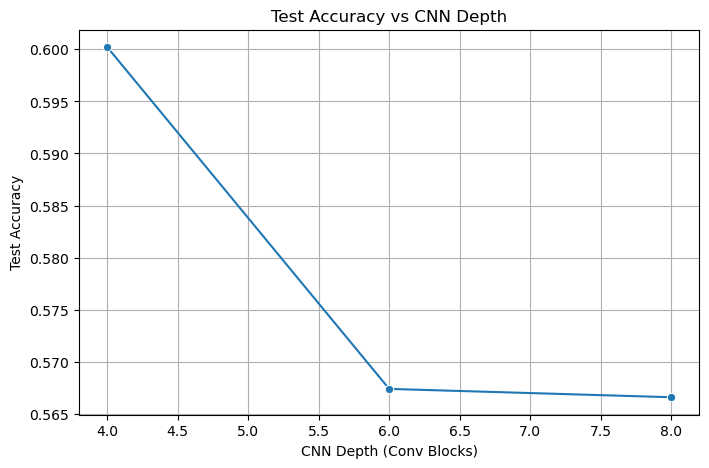

In [11]:
# Training loop for depths 4, 6, 8
depths = [4, 6, 8]
results = []

for depth in depths:
    print(f"\nTraining CNN with depth = {depth}")
    model = create_cnn_model(depth=depth, dropout_rate=0.5)

    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=50,
                        validation_split=0.2,
                        callbacks=[early_stop],
                        verbose=1)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Depth {depth} Test Accuracy: {test_acc:.4f}")

    results.append({'Depth': depth, 'Test Accuracy': test_acc})

    
# Plotting
df_depth = pd.DataFrame(results)
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_depth, x='Depth', y='Test Accuracy', marker='o')
plt.title("Test Accuracy vs CNN Depth")
plt.xlabel("CNN Depth (Conv Blocks)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

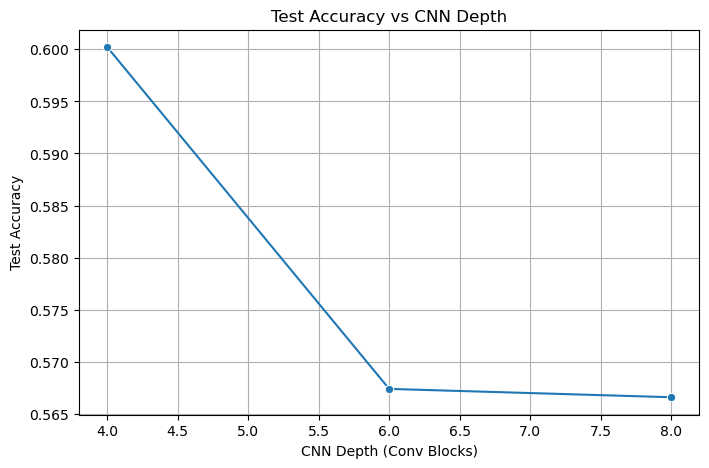

In [13]:
# Plotting
df_depth = pd.DataFrame(results)
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_depth, x='Depth', y='Test Accuracy', marker='o')
plt.title("Test Accuracy vs CNN Depth")
plt.xlabel("CNN Depth (Conv Blocks)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

#### Data Augmentation


Training CNN with depth = 4 and data augmentation
Epoch 1/70
391/391 [==============================] - 539s 1s/step - loss: 4.1985 - accuracy: 0.0625 - val_loss: 4.4782 - val_accuracy: 0.0328
Epoch 2/70
391/391 [==============================] - 539s 1s/step - loss: 3.7968 - accuracy: 0.1098 - val_loss: 4.1245 - val_accuracy: 0.0939
Epoch 3/70
391/391 [==============================] - 538s 1s/step - loss: 3.5795 - accuracy: 0.1451 - val_loss: 3.6645 - val_accuracy: 0.1619
Epoch 4/70
391/391 [==============================] - 538s 1s/step - loss: 3.3961 - accuracy: 0.1747 - val_loss: 3.8534 - val_accuracy: 0.1469
Epoch 5/70
391/391 [==============================] - 537s 1s/step - loss: 3.2298 - accuracy: 0.2044 - val_loss: 3.6075 - val_accuracy: 0.1953
Epoch 6/70
391/391 [==============================] - 543s 1s/step - loss: 3.0862 - accuracy: 0.2331 - val_loss: 3.1060 - val_accuracy: 0.2580
Epoch 7/70
391/391 [==============================] - 540s 1s/step - loss: 2.9623 - accurac

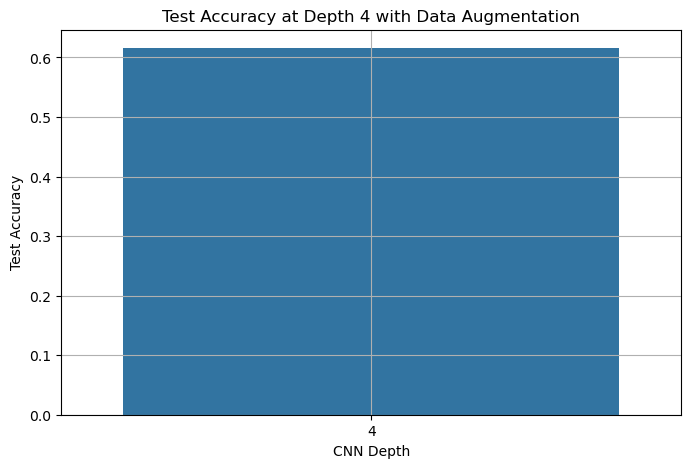

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Augmentation Setup
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest'
)
datagen.fit(x_train)

# Function to build a CNN model with variable conv block depth
def create_cnn_model(depth, dropout_rate=0.5):
    model = Sequential()
    filters = [64, 128, 256, 512]

    for i in range(depth):
        num_filters = filters[i % len(filters)]
        if i == 0:
            model.add(Conv2D(num_filters, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
        else:
            model.add(Conv2D(num_filters, (3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, (3, 3), activation='relu', padding='same'))

        if (i + 1) % 2 == 0 or i == depth - 1:
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(dropout_rate))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(100, activation='softmax'))

    return model

# Train only for depth = 4 with augmentation
results = []

depth = 4
print(f"\nTraining CNN with depth = {depth} and data augmentation")
model = create_cnn_model(depth=depth, dropout_rate=0.5)

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=70,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop],
                    verbose=1)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Depth {depth} Test Accuracy: {test_acc:.4f}")

results.append({'Depth': depth, 'Test Accuracy': test_acc})

# Plotting
df_depth = pd.DataFrame(results)
plt.figure(figsize=(8, 5))
sns.barplot(data=df_depth, x='Depth', y='Test Accuracy')
plt.title("Test Accuracy at Depth 4 with Data Augmentation")
plt.xlabel("CNN Depth")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()